In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import *
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence

C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

ModuleNotFoundError: No module named 'keras'

In [43]:
df = pd.read_csv(r'C:\Users\estre\Downloads\coin_Dogecoin.csv', parse_dates=['Date'])
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2631 non-null   int64         
 1   Name       2631 non-null   object        
 2   Symbol     2631 non-null   object        
 3   Date       2631 non-null   datetime64[ns]
 4   High       2631 non-null   float64       
 5   Low        2631 non-null   float64       
 6   Open       2631 non-null   float64       
 7   Close      2631 non-null   float64       
 8   Volume     2631 non-null   float64       
 9   Marketcap  2631 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 205.7+ KB


In [45]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2631.000000,2631.000000,2631.000000,2631.000000,2631.000000,2.631000e+03,2.631000e+03
mean,1316.000000,0.002566,0.002243,0.002394,0.002410,1.063104e+08,2.874625e+08
std,759.648603,0.006796,0.005422,0.006064,0.006118,8.458638e+08,7.822927e+08
min,1.000000,0.000089,0.000085,0.000087,0.000087,0.000000e+00,1.509085e+06
25%,658.500000,0.000229,0.000220,0.000224,0.000224,2.338655e+05,2.314820e+07
50%,1316.000000,0.001645,0.001387,0.001523,0.001523,4.485170e+06,1.552847e+08
75%,1973.500000,0.002810,0.002625,0.002710,0.002714,3.863918e+07,3.298987e+08
max,2631.000000,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10


In [46]:
# Formatting the time 

df['Date'] = pd.to_datetime(df['Date']).dt.date

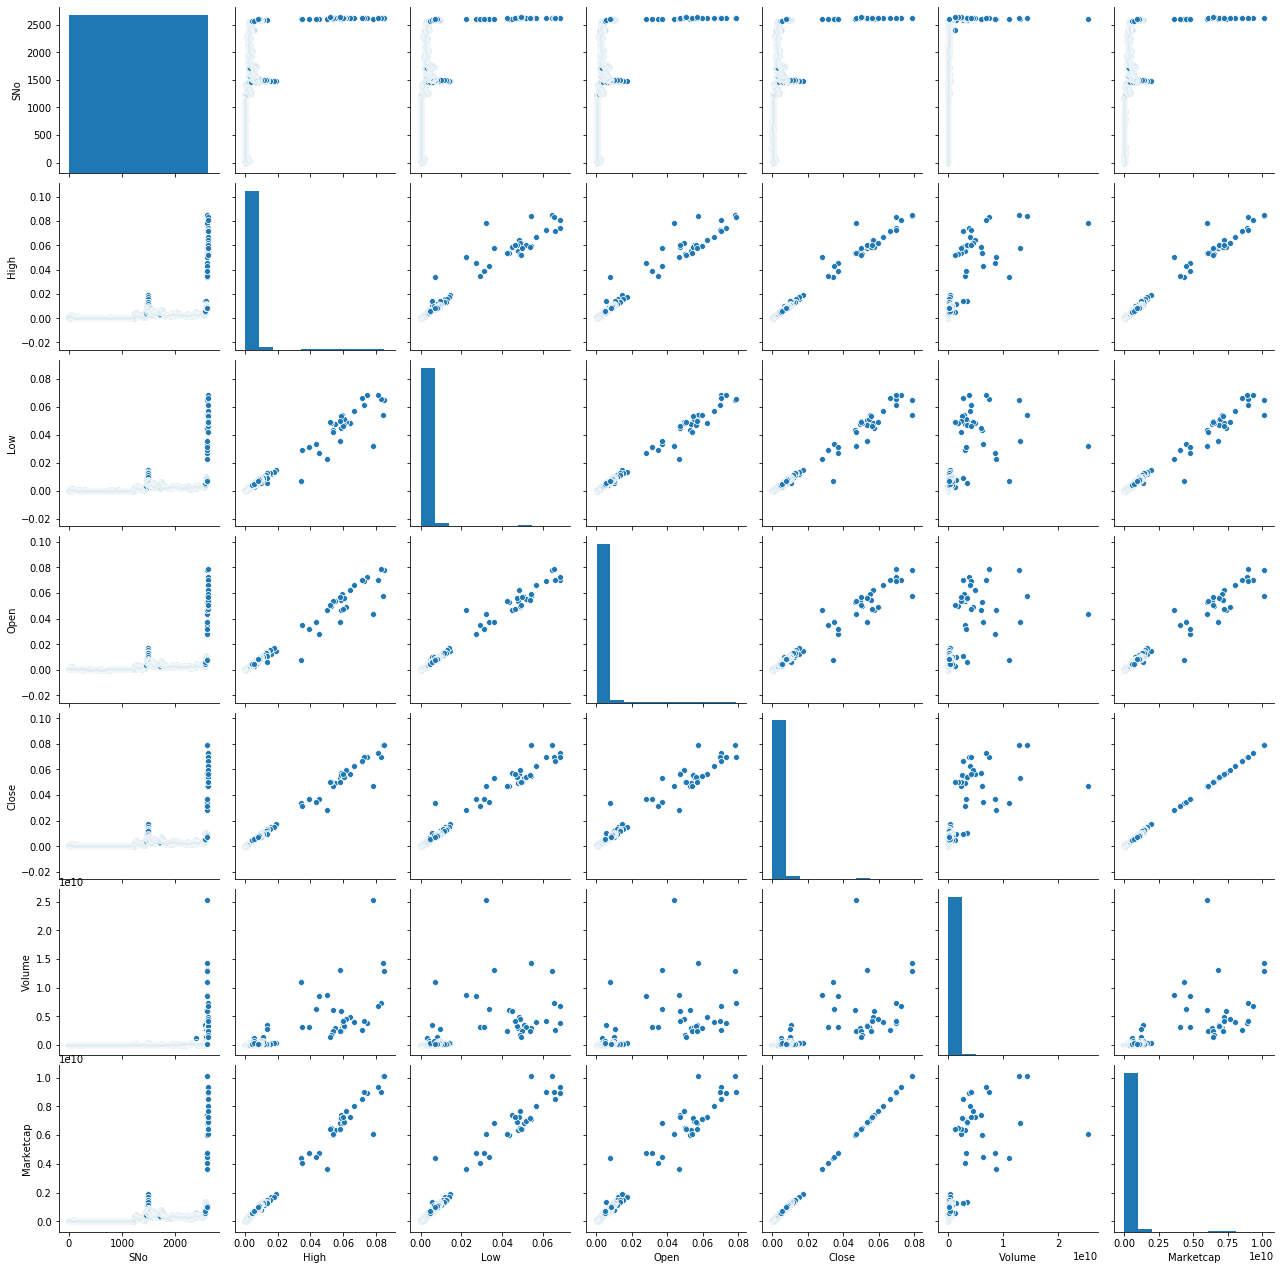

In [47]:
sns.pairplot(df)

In [48]:
Date_Marketcap = df[['Date','Marketcap']]
Date_Marketcap.head()

,Date,Marketcap
0,2013-12-16,1.509085e+06
1,2013-12-17,2.169688e+06
2,2013-12-18,3.188943e+06
3,2013-12-19,1.115034e+07
4,2013-12-20,7.284337e+06


Text(0, 0.5, 'Marketcap')

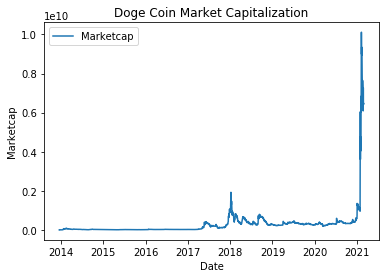

In [49]:
#  Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. 
# Market Capitalization growth throughout the years
TimevsMarketcap = Date_Marketcap.set_index('Date')
TimevsMarketcap.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Marketcap')

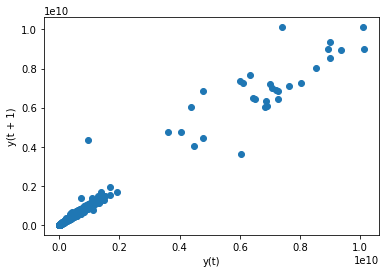

In [50]:
#Marketcap data distribution 
pd.plotting.lag_plot(df['Marketcap'])

In [51]:
Date_Close = df[['Date','Close']]
Date_Close.head()

,Date,Close
0,2013-12-16,0.000205
1,2013-12-17,0.000269
2,2013-12-18,0.000362
3,2013-12-19,0.001162
4,2013-12-20,0.000704


Text(0, 0.5, 'Close')

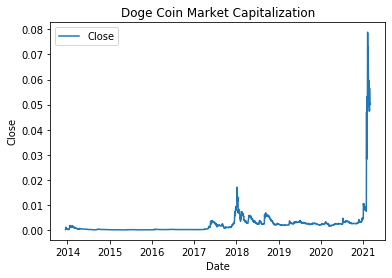

In [52]:
TimevsClose = Date_Close.set_index('Date')
TimevsClose.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Close')

In [53]:
df.Marketcap.describe()

count    2.631000e+03
mean     2.874625e+08
std      7.822927e+08
min      1.509085e+06
25%      2.314820e+07
50%      1.552847e+08
75%      3.298987e+08
max      1.011246e+10
Name: Marketcap, dtype: float64

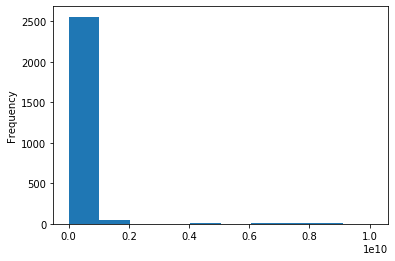

In [54]:
df.Marketcap.plot.hist()

In [55]:
y = df.Marketcap.values
y.shape

(2631,)

In [36]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\estre\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


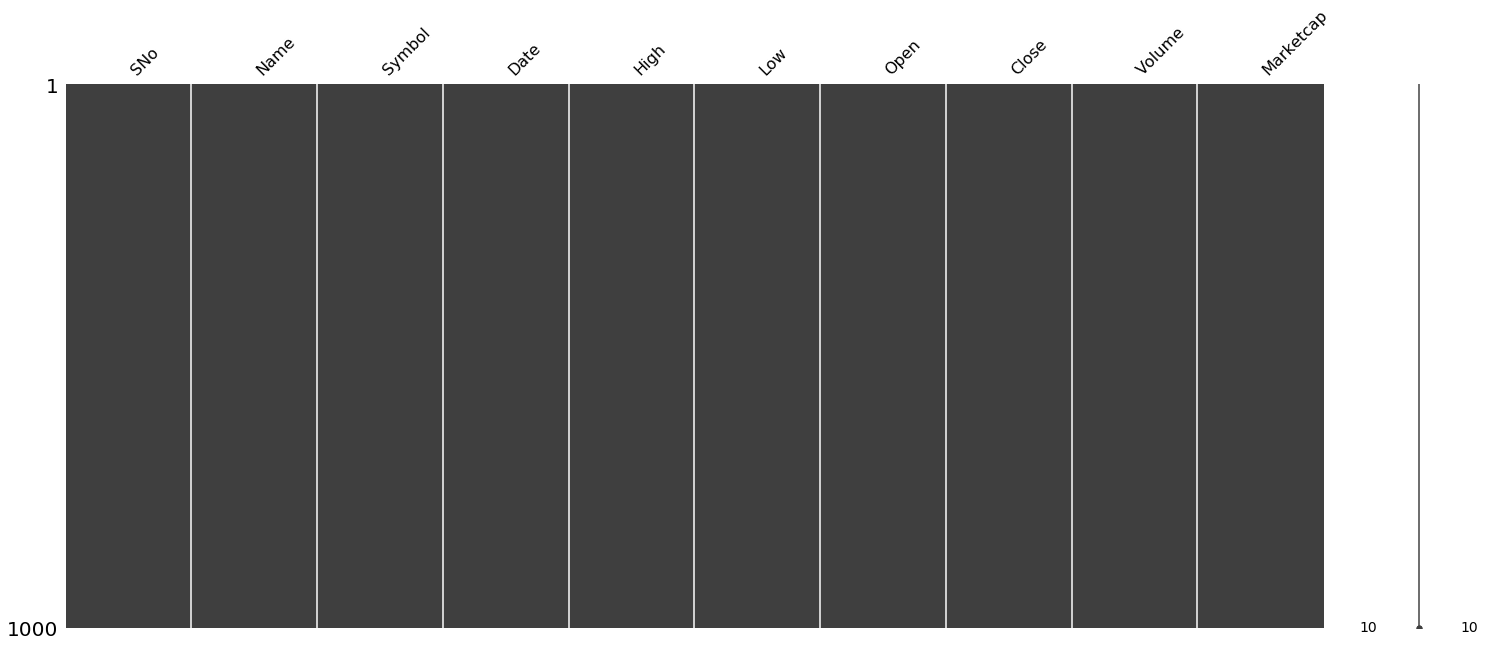

In [17]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))

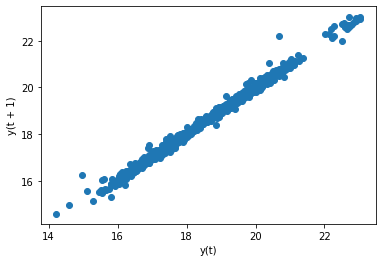

In [56]:
pd.plotting.lag_plot(np.log(df['Marketcap']))

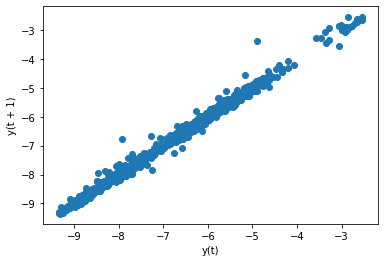

In [57]:
pd.plotting.lag_plot(np.log(df['Close']))

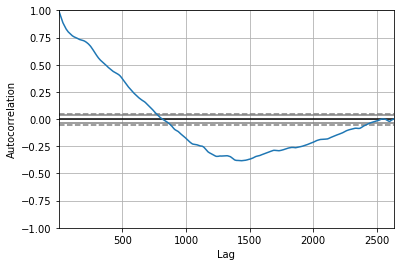

In [58]:
pd.plotting.autocorrelation_plot(np.log(df['Close']))

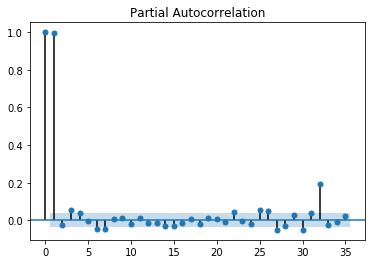

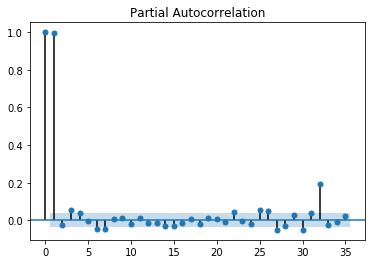

In [59]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].apply(np.log))

In [60]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'].apply(np.log).values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])

ADF-Statistic: -0.5976264919768156
p-value: 0.8715174409943303
Critical Values {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}


In [61]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Marketcap'].apply(np.log).values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])

ADF-Statistic: -0.9331635578259219
p-value: 0.7768551336330669
Critical Values {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}


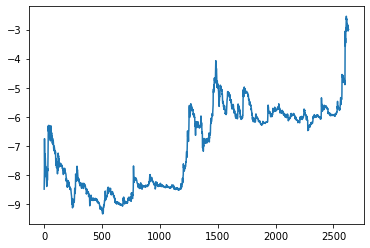

In [62]:
df['Close'].apply(np.log).plot()

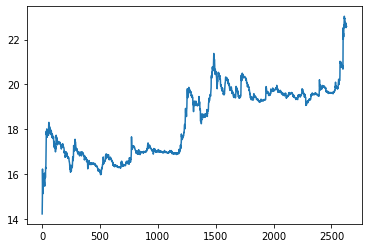

In [63]:
df['Marketcap'].apply(np.log).plot()

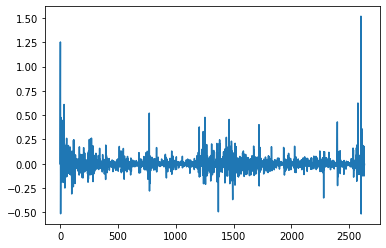

In [75]:

#pandas series.diff()
df['Marketcap'].apply(np.log).diff().fillna(0).plot()

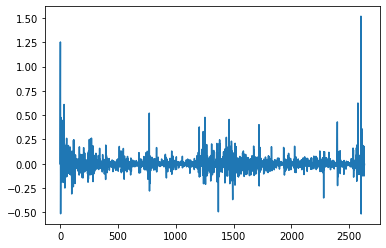

In [50]:

#pandas series.diff()
df['Marketcap'].apply(np.log).diff().fillna(0).plot()

In [64]:

adf_test = adfuller(df['Close'].apply(np.log).diff().dropna().values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])

ADF-Statistic: -19.361424426545863
p-value: 0.0
Critical Values {'1%': -3.4328445535976133, '5%': -2.8626421034231315, '10%': -2.5673566884539056}


In [29]:
Jupyter Notebook
Doge Coin Analysis
Last Checkpoint: 15 minutes ago
(unsaved changes)
adf_test = adfuller(df['Marketcap'].apply(np.log).diff().dropna().values)
print('ADF-Statistic:',adf_test[0])
Current Kernel Logo
Python 3 
File
Edit
View
Insert
Cell
Kernel
Widgets
Help

Code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers.core import *
from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
from tensorflow.python.keras.models import Model, Sequential
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from keras.models import Sequential
from keras.utils import Sequence
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint16 = np.dtype([("quint16", np.uint16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint32 = np.dtype([("qint32", np.int32, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  np_resource = np.dtype([("resource", np.ubyte, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint16 = np.dtype([("quint16", np.uint16, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:545: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint32 = np.dtype([("qint32", np.int32, 1)])
C:\Users\estre\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:550: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  np_resource = np.dtype([("resource", np.ubyte, 1)])
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-42-68315ec6b116> in <module>
     13 from tensorflow.python.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Bidirectional, Input
     14 from tensorflow.python.keras.models import Model, Sequential
---> 15 from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
     16 from keras.models import Sequential
     17 from keras.utils import Sequence

ModuleNotFoundError: No module named 'keras'

df = pd.read_csv(r'C:\Users\estre\Downloads\coin_Dogecoin.csv', parse_dates=['Date'])
df.head()
SNo	Name	Symbol	Date	High	Low	Open	Close	Volume	Marketcap
0	1	Dogecoin	DOGE	2013-12-16 23:59:59	0.000866	0.000150	0.000299	0.000205	0.0	1.509085e+06
1	2	Dogecoin	DOGE	2013-12-17 23:59:59	0.000289	0.000116	0.000207	0.000269	0.0	2.169688e+06
2	3	Dogecoin	DOGE	2013-12-18 23:59:59	0.000362	0.000205	0.000267	0.000362	0.0	3.188943e+06
3	4	Dogecoin	DOGE	2013-12-19 23:59:59	0.001520	0.000328	0.000395	0.001162	0.0	1.115034e+07
4	5	Dogecoin	DOGE	2013-12-20 23:59:59	0.001143	0.000662	0.001143	0.000704	0.0	7.284337e+06
df.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2631 entries, 0 to 2630
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2631 non-null   int64         
 1   Name       2631 non-null   object        
 2   Symbol     2631 non-null   object        
 3   Date       2631 non-null   datetime64[ns]
 4   High       2631 non-null   float64       
 5   Low        2631 non-null   float64       
 6   Open       2631 non-null   float64       
 7   Close      2631 non-null   float64       
 8   Volume     2631 non-null   float64       
 9   Marketcap  2631 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 205.7+ KB
df.describe()
SNo	High	Low	Open	Close	Volume	Marketcap
count	2631.000000	2631.000000	2631.000000	2631.000000	2631.000000	2.631000e+03	2.631000e+03
mean	1316.000000	0.002566	0.002243	0.002394	0.002410	1.063104e+08	2.874625e+08
std	759.648603	0.006796	0.005422	0.006064	0.006118	8.458638e+08	7.822927e+08
min	1.000000	0.000089	0.000085	0.000087	0.000087	0.000000e+00	1.509085e+06
25%	658.500000	0.000229	0.000220	0.000224	0.000224	2.338655e+05	2.314820e+07
50%	1316.000000	0.001645	0.001387	0.001523	0.001523	4.485170e+06	1.552847e+08
75%	1973.500000	0.002810	0.002625	0.002710	0.002714	3.863918e+07	3.298987e+08
max	2631.000000	0.084945	0.068525	0.078773	0.078825	2.540331e+10	1.011246e+10
# Formatting the time 
​
df['Date'] = pd.to_datetime(df['Date']).dt.date
sns.pairplot(df)
<seaborn.axisgrid.PairGrid at 0x28899c93e08>

Date_Marketcap = df[['Date','Marketcap']]
Date_Marketcap.head()
Date	Marketcap
0	2013-12-16	1.509085e+06
1	2013-12-17	2.169688e+06
2	2013-12-18	3.188943e+06
3	2013-12-19	1.115034e+07
4	2013-12-20	7.284337e+06
#  Market capitalization refers to the total dollar market value of a company's outstanding shares of stock. 
# Market Capitalization growth throughout the years
TimevsMarketcap = Date_Marketcap.set_index('Date')
TimevsMarketcap.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Marketcap')
Text(0, 0.5, 'Marketcap')

#Marketcap data distribution 
pd.plotting.lag_plot(df['Marketcap'])
<matplotlib.axes._subplots.AxesSubplot at 0x2889cdf7e48>

Date_Close = df[['Date','Close']]
Date_Close.head()
Date	Close
0	2013-12-16	0.000205
1	2013-12-17	0.000269
2	2013-12-18	0.000362
3	2013-12-19	0.001162
4	2013-12-20	0.000704
TimevsClose = Date_Close.set_index('Date')
TimevsClose.plot()
plt.title('Doge Coin Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Close')
Text(0, 0.5, 'Close')

df.Marketcap.describe()
count    2.631000e+03
mean     2.874625e+08
std      7.822927e+08
min      1.509085e+06
25%      2.314820e+07
50%      1.552847e+08
75%      3.298987e+08
max      1.011246e+10
Name: Marketcap, dtype: float64
df.Marketcap.plot.hist()
<matplotlib.axes._subplots.AxesSubplot at 0x2889ceadd08>

y = df.Marketcap.values
y.shape
(2631,)
conda install -c conda-forge/label/gcc7 missingno
Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\estre\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:          10 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0



Downloading and Extracting Packages

missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
missingno-0.4.1      | 10 KB     | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1000))
<matplotlib.axes._subplots.AxesSubplot at 0x2888df39348>

pd.plotting.lag_plot(np.log(df['Marketcap']))
<matplotlib.axes._subplots.AxesSubplot at 0x2889cf28ec8>

pd.plotting.lag_plot(np.log(df['Close']))
<matplotlib.axes._subplots.AxesSubplot at 0x2889cf8e708>

pd.plotting.autocorrelation_plot(np.log(df['Close']))
<matplotlib.axes._subplots.AxesSubplot at 0x2889cf34c88>

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close'].apply(np.log))


from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'].apply(np.log).values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])
ADF-Statistic: -0.5976264919768156
p-value: 0.8715174409943303
Critical Values {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Marketcap'].apply(np.log).values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])
ADF-Statistic: -0.9331635578259219
p-value: 0.7768551336330669
Critical Values {'1%': -3.432864698592546, '5%': -2.8626509998056635, '10%': -2.567361424947927}
df['Close'].apply(np.log).plot()
<matplotlib.axes._subplots.AxesSubplot at 0x2889d067e48>

df['Marketcap'].apply(np.log).plot()
<matplotlib.axes._subplots.AxesSubplot at 0x2889e121a88>

​
#pandas series.diff()
df['Close'].apply(np.log).diff().fillna(0).plot()
<matplotlib.axes._subplots.AxesSubplot at 0x2888e302d08>

ap
​
#pandas series.diff()
df['Marketcap'].apply(np.log).diff().fillna(0).plot()
<matplotlib.axes._subplots.AxesSubplot at 0x284e04be348>

​
adf_test = adfuller(df['Close'].apply(np.log).diff().dropna().values)
print('ADF-Statistic:',adf_test[0])
print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])
ADF-Statistic: -19.361424426545863
p-value: 0.0
Critical Values {'1%': -3.4328445535976133, '5%': -2.8626421034231315, '10%': -2.5673566884539056}
Jupyter Notebook
Doge Coin Analysis
Last Checkpoint: 15 minutes ago
(unsaved changes)
Jupyter Notebook
Doge Coin Analysis
Last Checkpoint: 15 minutes ago
(unsaved changes)
adf_test = adfuller(df['Marketcap'].apply(np.log).diff().dropna().values)

print('p-value:',adf_test[1])
print('Critical Values', adf_test[4])

ADF-Statistic: -18.89534128134872
p-value: 0.0
Critical Values {'1%': -3.4328445535976133, '5%': -2.8626421034231315, '10%': -2.5673566884539056}


In [65]:

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Close'].apply(np.log).values) 
print('KPSS-Statistic:',kpss_test[0])
print('p-value:',kpss_test[1])
print('Critical Values', kpss_test[1])

KPSS-Statistic: 6.657775685386381
p-value: 0.01
Critical Values 0.01


C:\Users\estre\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\estre\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [66]:

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df['Marketcap'].apply(np.log).values) 
print('KPSS-Statistic:',kpss_test[0])
print('p-value:',kpss_test[1])
print('Critical Values', kpss_test[1])

KPSS-Statistic: 7.36364491007013
p-value: 0.01
Critical Values 0.01


C:\Users\estre\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [32]:
X = df['Close'].apply(np.log).dropna().values
forecast = 30
X_train, X_test = X[len(X)-2*forecast:len(X)-forecast], X[len(X)-forecast:]

In [33]:

autoreg = AutoReg(X_train, lags=2)
autoreg_fit = autoreg.fit()
print('Coefficients:{}'.format(autoreg_fit.params))

Coefficients:[-3.83268366  0.06437098  0.11115576]


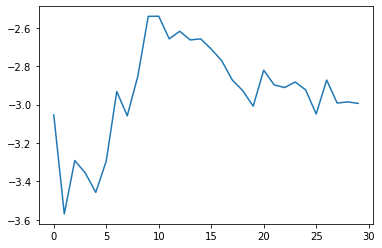

In [34]:
plt.plot(X_test)

In [70]:
pip install tensorflow==1.14

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=97fe8cc0d17488ea59c751a7a843a1d83596352c6a4e27aed7518f7d61fc6123
  Stored in directory: c:\users\estre\appdata\local\pip\cache\wheels\3f\e3\ec\8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


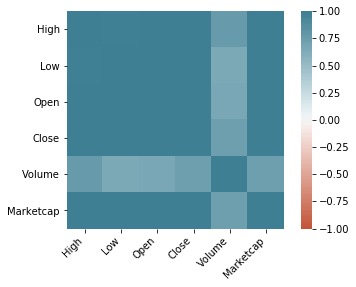

In [67]:
corr = df.drop('SNo',1).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [69]:

def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(df, test_size=0.2)
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16)
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

NameError: name 'target_col' is not defined

In [40]:
train

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...
2100,2101,Dogecoin,DOGE,2019-09-16,0.002491,0.002430,0.002462,0.002455,3.111529e+07,2.976474e+08
2101,2102,Dogecoin,DOGE,2019-09-17,0.002615,0.002443,0.002454,0.002608,3.893466e+07,3.162130e+08
2102,2103,Dogecoin,DOGE,2019-09-18,0.002993,0.002582,0.002607,0.002719,4.552697e+07,3.296498e+08
2103,2104,Dogecoin,DOGE,2019-09-19,0.002734,0.002589,0.002718,0.002709,4.646367e+07,3.285627e+08


In [70]:
scaler = MinMaxScaler()

close_price = df.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [71]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [72]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)